In [1]:
import numpy as np
from hipposlam.utils import read_pickle
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data_pth = 'data/data.pickle'
data = read_pickle(data_pth)
stored_f = data['stored_f']
del data['stored_f']

df = pd.DataFrame(data)
df['X_Nrow'] = df['X'].apply(lambda x : x.shape[0])
print('Max x row ', df['X_Nrow'].max())
df



Max x row  53


,t,x,y,z,a,objID,X,X_Nrow
0,128,-4.066631,3.310061,0.053973,3.141580,[15628],"[[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]",1
1,256,-4.143492,3.310062,0.058338,3.141580,[15628],"[[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]]",1
2,384,-4.220338,3.310063,0.058849,3.141580,[15628],"[[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]]",1
3,512,-4.297157,3.310064,0.059057,3.141580,[15628],"[[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]]",1
4,640,-4.373964,3.310065,0.059142,3.141580,[15628],"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]]",1
...,...,...,...,...,...,...,...,...
20293,2597632,-4.928980,1.906895,0.059201,1.739331,"[314, 543, 3073, 7635, 14643, 16614]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...",53
20294,2597760,-4.941862,1.831183,0.059201,1.739331,"[314, 543, 3073, 7635, 14643, 16614]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...",53
20295,2597888,-4.954744,1.755471,0.059201,1.739331,"[314, 543, 3073, 7635, 14643, 16614]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...",53
20296,2598016,-4.967627,1.679759,0.059201,1.739331,"[314, 543, 3073, 7635, 14643, 16614]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...",53


In [8]:
stored_f

{15628: 0,
 7635: 1,
 3073: 2,
 314: 3,
 543: 4,
 17138: 5,
 16614: 6,
 16876: 7,
 15087: 8,
 15733: 9,
 15501: 10,
 15544: 11,
 2739: 12,
 15586: 13,
 15607: 14,
 15760: 15,
 14643: 16,
 9768: 17,
 2996: 18,
 2842: 19,
 2919: 20,
 5493: 21,
 2385: 22,
 3266: 23,
 14198: 24,
 15308: 25,
 15773: 26,
 801: 27,
 12542: 28,
 1025: 29,
 1279: 30,
 1503: 31,
 1981: 32,
 14422: 33,
 15523: 34,
 15565: 35,
 15747: 36,
 16352: 37,
 1757: 38,
 14864: 39,
 15827: 40,
 16090: 41,
 15649: 42,
 15670: 43,
 15691: 44,
 15712: 45,
 15786: 46,
 15799: 47,
 4159: 48,
 11099: 49,
 14120: 50,
 2765: 51,
 11734: 52}

In [3]:
df['a'].describe()

count    20298.000000
mean        -0.153831
std          1.884709
min         -3.141564
25%         -1.663772
50%         -0.145081
75%          1.470738
max          3.141580
Name: a, dtype: float64

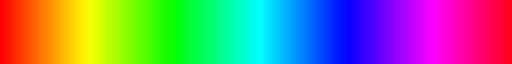

In [4]:
import matplotlib as mpl
from matplotlib import cm
norm = mpl.colors.Normalize(vmin=-np.pi, vmax=np.pi)

cmap = cm.hsv
cmap

In [5]:
Num_Fnodes = df['X_Nrow'].max()

xdict = dict()
ydict = dict()
adict = dict()
for i in range(df.shape[0]):

    Xmat = df['X'][i]
    x = df['x'][i]
    y = df['y'][i]
    a = df['a'][i]
    active_nodeIDs = np.where(np.sum(Xmat, axis=1) > 0)[0]

    for nodeID in active_nodeIDs:
        if nodeID in xdict:
            xdict[nodeID].append(x)
            ydict[nodeID].append(y)
            adict[nodeID].append(a)
        else:
            xdict[nodeID] = [x]
            ydict[nodeID] = [y]
            adict[nodeID] = [a]




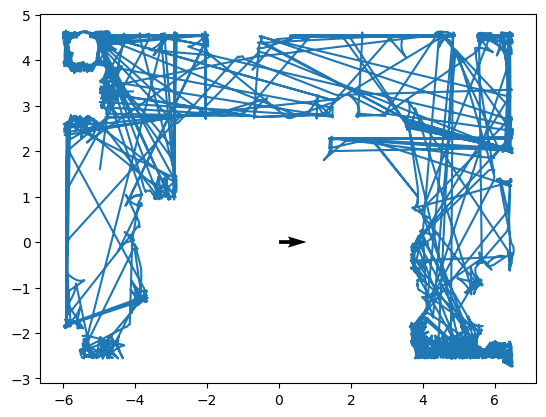

In [9]:
plt.plot(df.x ,df.y)
fooa = 0
plt.quiver(0, 0, np.real(np.exp(1j * fooa)), np.imag(np.exp(1j * fooa)))

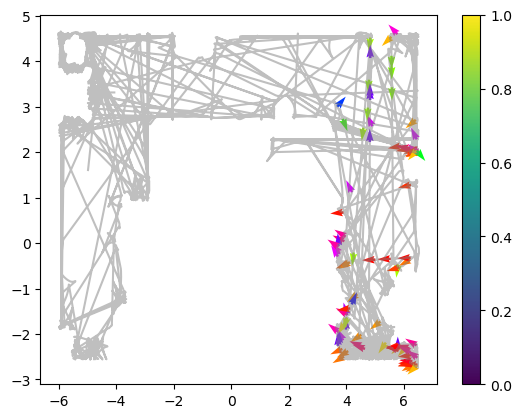

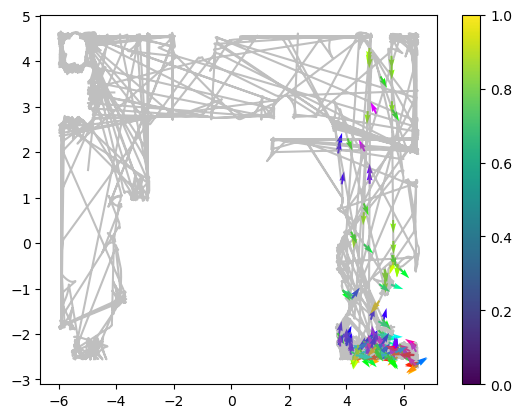

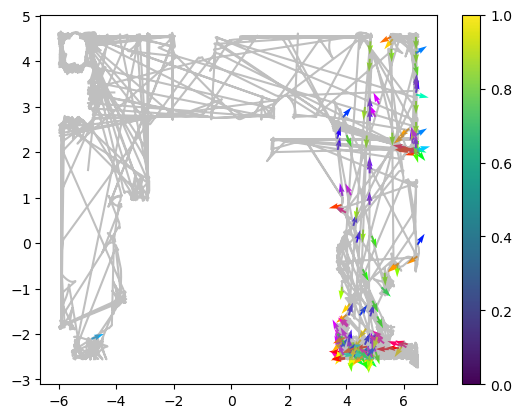

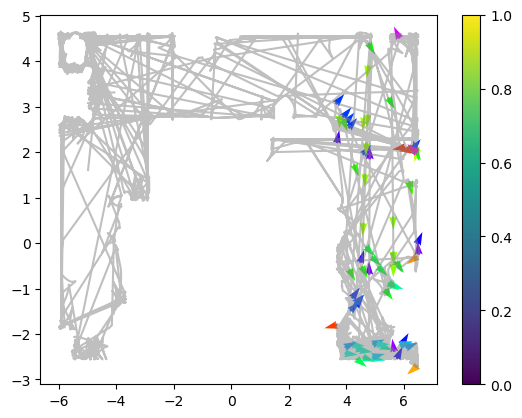

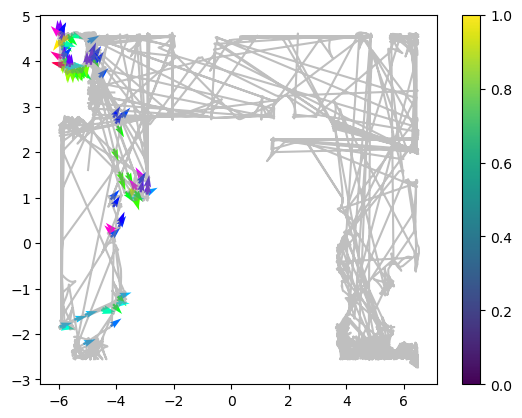

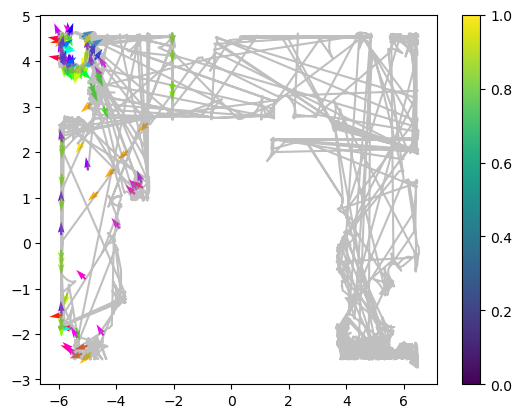

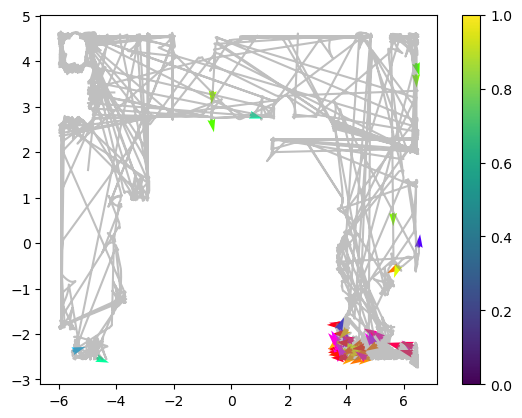

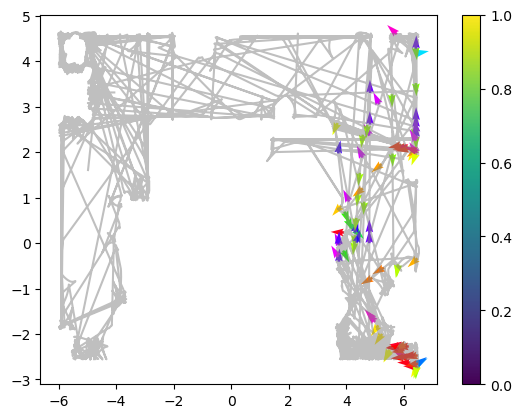

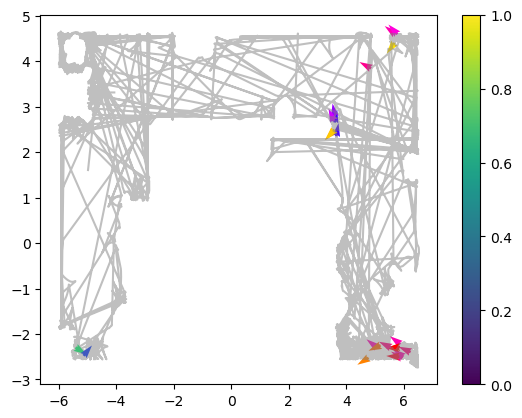

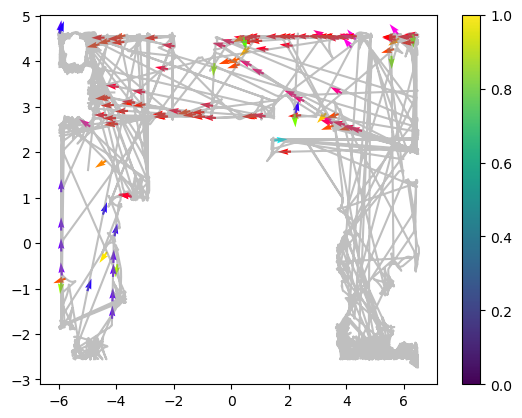

In [7]:
np.random.seed(0)
ivec = np.random.permutation(Num_Fnodes)
for i in ivec[:10]:
    N = len(xdict[i])
    frac = 0.05

    ranvec = np.random.permutation(N)


    x = np.array(xdict[i])[ranvec][:int(N*frac)]
    y = np.array(ydict[i])[ranvec][:int(N*frac)]
    a = np.array(adict[i])[ranvec][:int(N*frac)]
    angvec = np.exp(1j * a)

    fig, ax = plt.subplots()
    ax.plot(df.x, df.y, color='gray', alpha=0.5)

    # ax.scatter(x, y, alpha=0.5, marker='.')
    im = ax.quiver(x, y, np.real(angvec), np.imag(angvec), color=cmap(norm(a)), scale=30)
    plt.colorbar(im, ax=ax)

In [24]:
xall, yall = [], []
for key in xdict.keys():
    xall.extend(xdict[key])
    yall.extend(ydict[key])


print(np.min(xall), np.max(xall))
print(np.min(yall), np.max(yall))

-5.73571525324125 6.3144070762538895
-2.436510846368109 4.47933020997911
